 Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load data and store in dataframe df:

In [0]:
# path of data 
path = 'clean_csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h4>Lets load the modules for linear regression</h4>

In [0]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object</h4>

In [0]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg.

In [0]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [0]:
# Write your code below and press Shift+Enter to execute 
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# Write your code below and press Shift+Enter to execute 
lm1.fit(df[['engine-size']],df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h4>Slope</h4>

In [0]:
# Write your code below and press Shift+Enter to execute 
print(
lm1.coef_)

[[166.86001569]]


<h4>Intercept</h4>

In [0]:
# Write your code below and press Shift+Enter to execute 
print(lm1.intercept_)

[-7963.33890628]


In [0]:
lm1.predict(df[['engine-size']])

In [0]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [0]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
lm.intercept_

-15806.624626329205

In [0]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [0]:
# Write your code below and press Shift+Enter to execute 
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses']],df[['highway-mpg']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# Write your code below and press Shift+Enter to execute 
lm2.coef_


array([[-0.03873955]])

import the visualization package: seaborn

In [0]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

 Let's visualize Horsepower as potential predictor variable of price:

(0, 48264.98973519269)

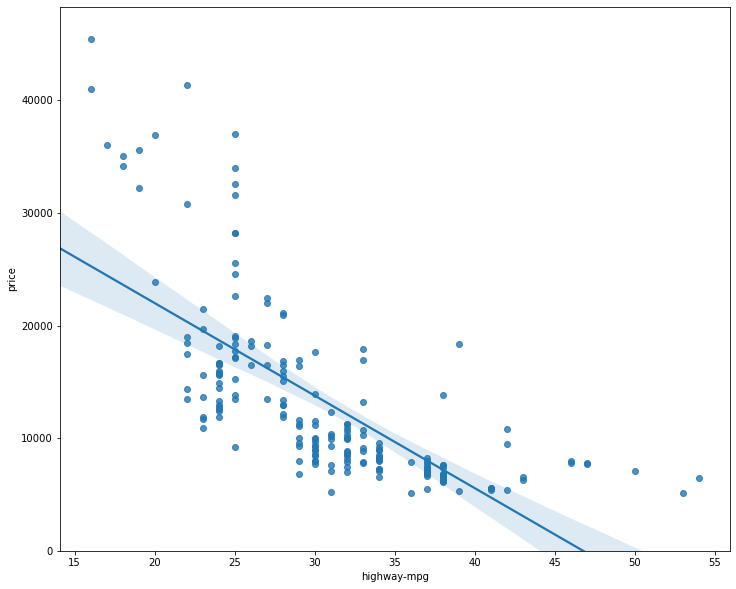

In [0]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

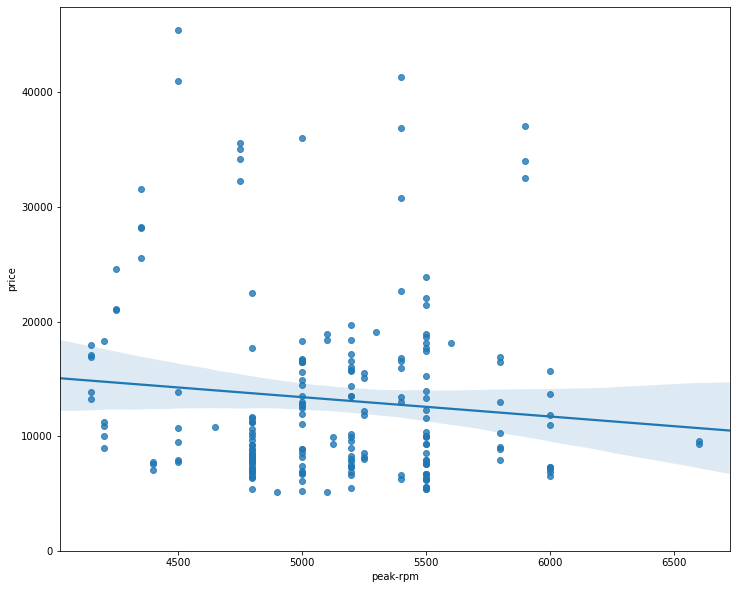

In [0]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

In [0]:
# Write your code below and press Shift+Enter to execute 
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


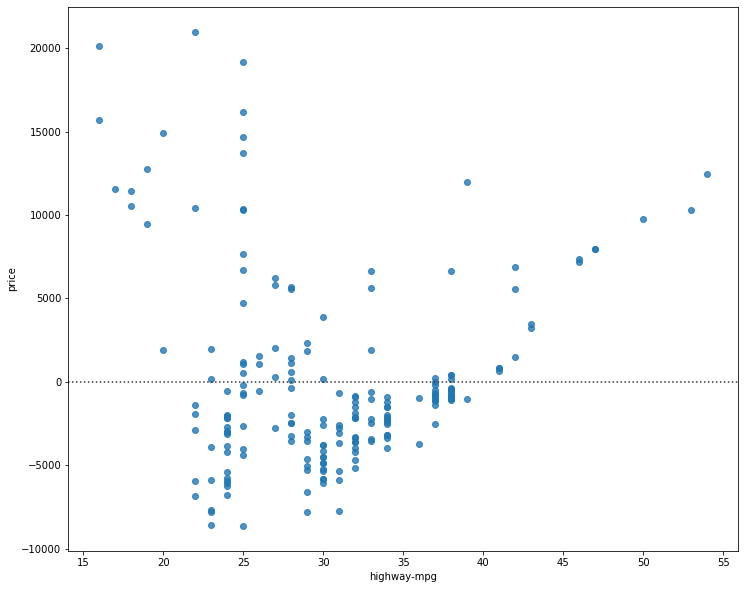

In [0]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [0]:
Y_hat = lm.predict(Z)

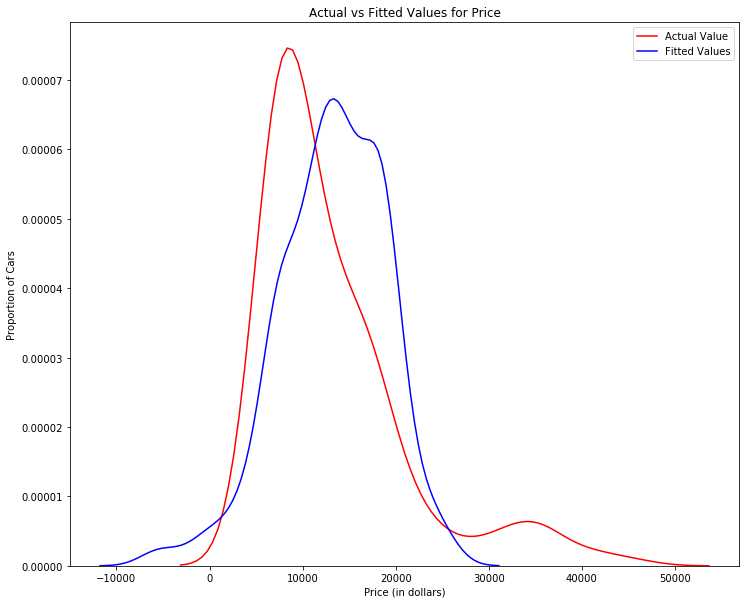

In [0]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

In [0]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

lets get the variables

In [0]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [0]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Let's plot the function 

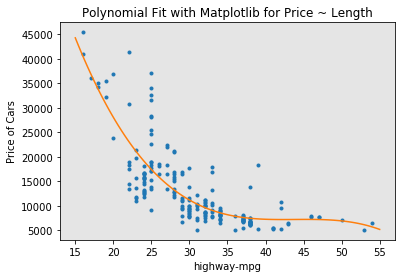

In [0]:
PlotPolly(p, x, y, 'highway-mpg')

In [0]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>

In [0]:

np.polyfit(x,y,11)

array([-1.24263389e-08,  4.72184883e-06, -8.02843466e-04,  8.05640287e-02,
       -5.29740970e+00,  2.39470324e+02, -7.58845723e+03,  1.68447250e+05,
       -2.56531146e+06,  2.55140616e+07, -1.49106961e+08,  3.87930076e+08])

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [0]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features 

In [0]:
Z.shape

(201, 4)

after the transformation, there 201 samples and 15 features

In [0]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [0]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

we input the list as an argument to the pipeline constructor 

In [0]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

We can normalize the data,  perform a transform and fit the model simultaneously. 

In [0]:
pipe.fit(Z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously

In [0]:
ypipe=pipe.predict(Z)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y</b>
</div>

In [0]:
# Write your code below and press Shift+Enter to execute 
p = [ ('scale',StandardScaler()),('model',LinearRegression())]

In [0]:
pipeline = Pipeline(p)
pipeline.fit(Z,y)
preds = pipeline.predict(Z)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [0]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [0]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

lets import the function <b>mean_squared_error</b> from the module <b>metrics</b>

In [0]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results 

In [0]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

Multiple Linear Regression</h3>

Let's calculate the R^2

In [0]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

 we produce a prediction 

In [0]:
Y_predict_multifit = lm.predict(Z)

 we compare the predicted results with the actual results 

In [0]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

Polynomial Fit</h3>

Let's calculate the R^2

let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function

In [0]:
from sklearn.metrics import r2_score

We apply the function to get the value of r^2

In [0]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

<h3>MSE</h3>

We can also calculate the MSE:  

In [0]:
mean_squared_error(df['price'], p(x))

<h2>Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input 

In [0]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Fit the model 

In [0]:
lm.fit(X, Y)
lm

Produce a prediction

In [0]:
yhat=lm.predict(new_input)
yhat[0:5]

we can plot the data 

In [0]:
plt.plot(new_input, yhat)
plt.show()